In [1]:
# Kết nối với gg drive cá nhân
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Truy cập vào folder project để sử dụng data
%cd /content/gdrive/MyDrive/Teaching/BKHN-Teaching/2/Màu nổi bật với KMeans

/content/gdrive/MyDrive/Teaching/BKHN-Teaching/2/Màu nổi bật với KMeans


In [1]:
!pip install yellowbrick

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import numpy as np
import cv2 # thư viện xử lý ảnh trong python
from sklearn.cluster import KMeans # Mô hình phân cụm KMeans
import os
import matplotlib.pyplot as plt # chuyên vẽ đồ thị show ảnh
import pandas as pd
from sklearn.cluster import KMeans #https://scikit-learn.org/stable/api/sklearn.cluster.html
from yellowbrick.cluster import KElbowVisualizer # cung cấp hàm sử dụng elbow

In [6]:
# Lấy đường dẫn folder chứa ảnh
folder_dir = r"data/image"

# In ra có bao nhiêu ảnh trong cat folder
print("My image: {} images".format(len(os.listdir(folder_dir))))

My image: 17 images


In [14]:
print(folder_dir)

data/image


(168, 300, 3)


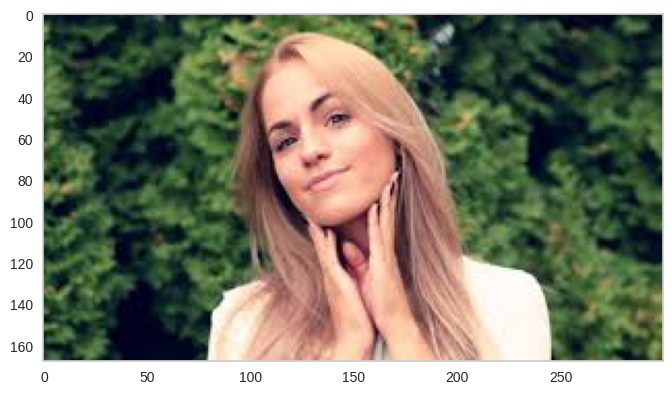

In [17]:
# Đọc ảnh
image = cv2.imread(os.path.join(folder_dir, "human3.jfif"))
# Do OpenCV đọc ảnh ở dạng BGR nên chúng ta dùng hàm cvtColor để chuyển sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Lấy size ảnh
print(image.shape)
# Hiển thị ảnh
plt.imshow(image)
plt.grid(False)
plt.show()

In [24]:
image.shape

(168, 300, 3)

In [26]:
# Chuyển shape của ma trận ảnh từ 3 chiều về 2 chiều
# Tạo 1 list chứa các data gồm 3 feature là red, green, blue
image_px = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Do đây là ảnh RGB nên ở mỗi ô sẽ có 3 giá trị màu là red, green, blue
        red, green, blue = image[i][j] # image[i, j]
        # Chèn vào cuối list
        image_px.append([red, green, blue])

# Chuyển list sang dạng numpy array với loại của nó là float
image_px = np.array(image_px).astype(np.float32)
# In ra size của image_px
print(image_px.shape)
# Bảng data pixel
table = pd.DataFrame(image_px, columns=["red","green","blue"])
# Chuẩn hóa các đặc trưng về trong khoảng 0 đến 1 do mỗi pixel ảnh có giá trị lớn nhất của 1 kênh là 255 nên ta chia 255 (như StandardScaler trong sklearn)
image_px = image_px/255.0
# Hiển thị 10 samples trong table
table.head(10)

(50400, 3)


,red,green,blue
0,40.0,60.0,58.0
1,22.0,42.0,40.0
2,13.0,33.0,34.0
3,22.0,42.0,43.0
4,28.0,47.0,53.0
5,22.0,41.0,47.0
6,16.0,34.0,44.0
7,16.0,34.0,44.0
8,9.0,27.0,41.0
9,5.0,23.0,37.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

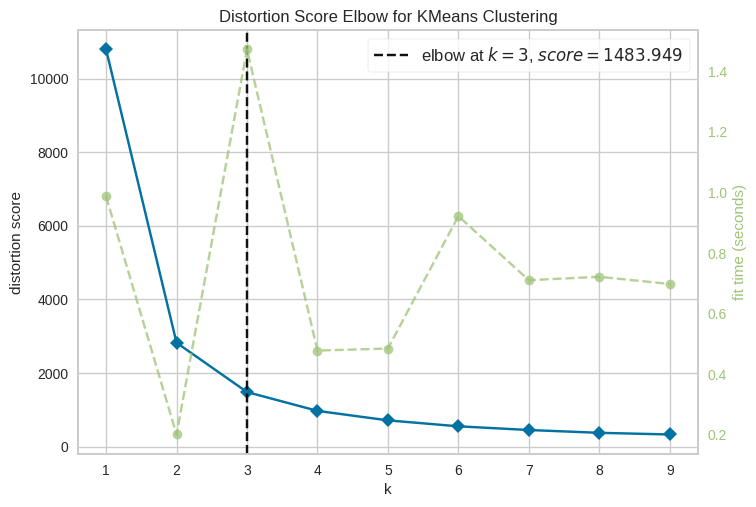

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(image_px)
visualize.poof()

In [27]:
# Chúng ta sử dụng Kmeans để thử phân chia ảnh thành các vùng
# Ở đây chúng ta muốn lấy object ở trong ảnh chúng ta, ta có thể set n_clusters = 2 có nghĩa là 2 vùng: 1 vùng là pixel thuộc nền, 1 vùng là object
n_clusters = 3
# Gọi model với số cluster đã set bên trên và fit vào dữ liệu
kmean = KMeans(n_clusters=n_clusters).fit(image_px)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
clusters = kmean.predict(image_px) # dự đoán thuộc cụm

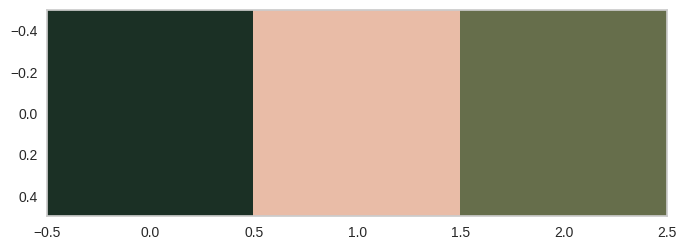

In [30]:
dominant_colors = []

for cluster_center in kmean.cluster_centers_:
    red_scaled, green_scaled, blue_scaled = cluster_center

    dominant_colors.append((
        red_scaled,
        green_scaled,
        blue_scaled
    ))

# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.grid(False)
plt.show()

In [ ]:
# Image Colorization with reference image

In [2]:
import cv2 # opencv: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html # pip install opencv-python
from PIL import Image # PIl

In [8]:
# đọc ảnh
image = cv2.imread("/content/gdrive/MyDrive/Teaching/BKHN-Teaching/2/Màu nổi bật với KMeans/data/image/cat.147.jpg")

In [20]:
print(image.shape)

(168, 300, 3)


In [23]:
# RGB:
print(image[0][0])

[40 60 58]
